Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

C:\Users\Anuja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


No Null value

In [4]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data1=data.rename({'R&D Spend':'R_DS','Administration':'ADM','Marketing Spend':'MKTS'},axis=1)
data1.head()

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
#chek for dupilcate entries.... No duplicates in given dataset
data1[data1.duplicated()]

,R_DS,ADM,MKTS,State,Profit


In [7]:
data1.describe()

,R_DS,ADM,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [8]:
c=data1.corr()
c

,R_DS,ADM,MKTS,Profit
R_DS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Research and development and profit has strong correlation. All feature has direct relationship with profit.

# EDA

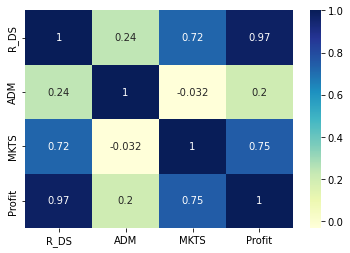

In [9]:
#heatmap
sns.heatmap(c,annot=True,cmap='YlGnBu')
plt.show()

The heatmap of correlation also demonstrates similar insights i.e. direct relationship with profit

Outlier Detection

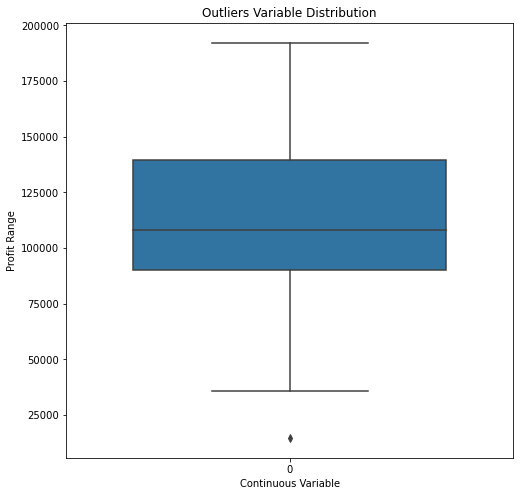

In [10]:
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data1['Profit'], orient="v", width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

 While looking at the boxplot we can see the outliers in the profit(target variable)

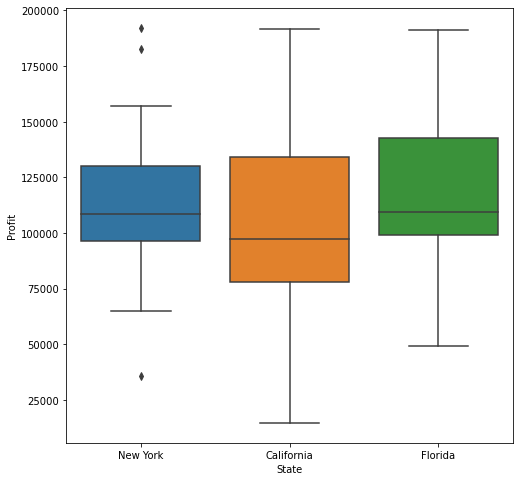

In [11]:
#State wise outliers detection
sns.boxplot(x = 'State', y = 'Profit', data = data1)
plt.show()

Above box plot shows outlier in New York. Also  California state have greater range in both maximum and minimum profit

# Histgram 

C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


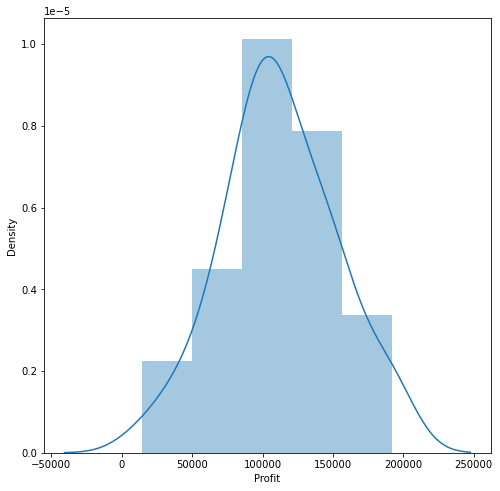

In [12]:
#Profit
sns.distplot(data1['Profit'],bins=5,kde=True)
plt.show()

The average profit (which is 100000) is the most frequent i.e. it's more likely to be in distribution plot

# Pair Plot

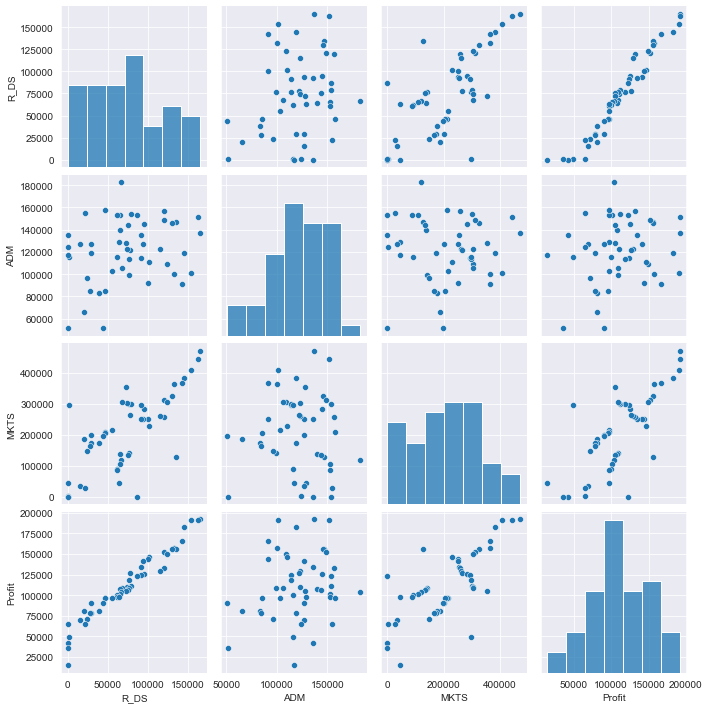

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

As we can see in the pairpot, 
1.More you invest in Research and Development the greater will be your profit.
2.The marketing spend seems to be directly proportional (though little bit outliers are there) with the profit.
3.The administration spend seems to have no relation with the profit.

# Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
data1['State']= labelencoder.fit_transform(data1['State'])
data1.head()

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Feature Scaling

In [20]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data2=asarray(data1)
print(data2)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data2)
print(scaled)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00 1.9226183e+05]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 1.9179206e+05]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00 1.9105039e+05]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 2.0000000e+00 1.8290199e+05]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00 1.6618794e+05]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 2.0000000e+00 1.5699112e+05]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00 1.5612251e+05]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00 1.5575260e+05]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 2.0000000e+00 1.5221177e+05]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00 1.4975996e+05]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00 1.4612195e+05]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00 1.4425940e+05]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00 1.4158552e+05]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.00000

In [21]:
data3=pd.DataFrame(scaled)

In [22]:
data3.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [24]:
# spliting Dataset in Dependent & Independent Variables
X = data3.iloc[:, :4].values
y = data3.iloc[:, 4].values

In [29]:
y

array([ 2.01120333,  1.99942997,  1.98084225,  1.77662724,  1.35774012,
        1.12724963,  1.10548055,  1.09620987,  1.00746967,  0.94602247,
        0.85484675,  0.80816756,  0.74115484,  0.55874952,  0.51602637,
        0.44871967,  0.3754357 ,  0.33477114,  0.307116  ,  0.26977265,
        0.16193522, -0.01753384, -0.04161264, -0.08216943, -0.08672946,
       -0.11549309, -0.15736664, -0.17554233, -0.21879755, -0.27588222,
       -0.3026246 , -0.36412744, -0.36552389, -0.38178711, -0.38344421,
       -0.38929092, -0.53393161, -0.5529549 , -0.77149734, -0.77709368,
       -0.84641135, -0.85746568, -1.01536466, -1.05896021, -1.17320899,
       -1.18008224, -1.56692212, -1.74062718, -1.91321197, -2.43931323])

# Split the data into train and test data

In [30]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[ 1.24505666,  0.87198001,  0.93218598,  0.        ],
       [ 1.01718075,  1.26919939,  0.37574227,  0.        ],
       [-1.60035036,  0.10125394, -1.72739998,  1.21267813],
       [-1.61043334, -2.50940884, -1.74312698,  1.21267813],
       [-0.17860854,  1.14245677, -0.85813366,  1.21267813],
       [ 0.89791312,  0.04586785,  0.4192187 ,  1.21267813],
       [-0.25807437, -0.20562866, -0.99035717,  0.        ],
       [-0.22694868,  0.28392381, -1.36244978, -1.21267813],
       [ 0.0944412 ,  0.00911842,  0.44044622, -1.21267813],
       [-1.10210556, -0.90693753, -0.52059596, -1.21267813],
       [ 0.05572609, -0.26958765,  0.72392599, -1.21267813],
       [-1.28113364,  0.21768152, -1.44960468,  1.21267813],
       [ 1.03036886,  0.9869521 ,  0.83088691,  1.21267813],
       [ 0.4020776 ,  0.51017895,  0.34395679, -1.21267813],
       [-0.19931169,  0.65648914, -0.60351673, -1.21267813],
       [ 1.27980001, -0.77623907,  1.25421046,  1.21267813],
       [ 0.46072013,  0.

In [31]:
y_train

array([ 1.09620987,  0.51602637, -1.18008224, -1.91321197, -0.27588222,
        0.44871967, -0.3026246 , -0.36552389,  0.3754357 , -1.01536466,
        0.16193522, -1.05896021,  1.00746967,  0.55874952, -0.11549309,
        1.12724963,  0.33477114, -0.84641135, -2.43931323,  1.99942997,
        0.74115484, -0.5529549 , -0.08672946,  1.10548055, -0.08216943,
       -0.53393161, -0.01753384,  0.26977265,  0.94602247, -0.77709368,
       -1.56692212,  1.77662724,  2.01120333, -1.74062718, -1.17320899])

# Preparing a Model

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [34]:
#Prediction on test
y_pred = model.predict(x_test)
y_pred


array([-0.19942955,  0.5148974 ,  0.5418493 , -0.99436796,  1.69533326,
        0.06709071, -1.14026521, -0.33961349,  0.05719308,  1.43048429,
       -0.39424322, -0.59908997, -0.0332202 , -0.53823846,  0.39529604])

In [35]:
test_score = model.score(x_test, y_test)
print("Model Score on Test data",test_score)

train_score = model.score(x_train, y_train)
print("Model Score on Train data",train_score)

Model Score on Test data 0.9355139722149945
Model Score on Train data 0.9515496105627431


In [36]:
test_prediction = pd.DataFrame(data={'Actual Value':y_test,'Predicted value':y_pred})
test_prediction

,Actual Value,Predicted value
0,-0.218798,-0.199430
1,0.808168,0.514897
2,0.854847,0.541849
3,-0.857466,-0.994368
4,1.980842,1.695333
5,-0.175542,0.067091
6,-0.771497,-1.140265
7,-0.364127,-0.339613
8,-0.041613,0.057193
9,1.357740,1.430484


# Model evaluation

R-squared
Higher R-squared values represent smaller differences between the observed data and the fitted values.
R-squared value > 85% is preffered

In [38]:
#r-square value
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R-squared score of model is :" ,r2Score*100)

R-squared score of model is : 93.39448007716635


Model is good

MSE:Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the points.
The lower the MSE, the better the forecast.

In [39]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 3.909622683697507


RMSE: Root Mean Squared Error. This is the similar to Mean squared error(MSE) approach, the only difference is that here we find the root of mean squared error i.e. root of Mean squared error is equals to Root Mean Squared Error. The reason behind finding the root is to find the more close residual error as compared to the values found by mean squared error.

In [40]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  19.772765824986415


MAE: Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 0.16299250206970547
